# Required packages

In [1]:
import numpy as np
import time

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def confusion_ma(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    fig, ax = plt.subplots(figsize=(10,10)) # to adjust figure size
    disp.plot(ax=ax, cmap=plt.cm.Blues)
    return plt.show()

# Download dataset<a name = 'download_dataset'></a>

In [3]:
from sklearn.datasets import fetch_openml

# a workaround to avoid multiple downloads of the dataset.
from joblib import Memory
memory = Memory('./tmp')
fetch_openml_cached = memory.cache(fetch_openml)

# Load data from https://www.openml.org/d/554
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html
X, y = fetch_openml_cached('mnist_784', version=1, return_X_y=True, data_home = '../DATASETS') # it takes time! - Downloads everytime!

In [4]:
y = np.int32(y)

# Prepare train and test sets<a name=  'prepare_datasets'></a>

In [5]:
N = 60000

X_train = np.float64(X[:N]) # np.float64 is used to avoid warnings when preprocessing data
y_train = y[:N]

X_test = np.float64(X[N:])
y_test = y[N:]

# Logistic Regression (Softmax Regression)

In [24]:

model = LogisticRegression(random_state=0, max_iter = 100) # softmax / one vs all / one vs one

start_time = time.time()

model.fit(X_train, y_train)

print("Elapsed time %.2f seconds." % (time.time() - start_time))

Elapsed time 9.77 seconds.


C:\Users\ashkan\Anaconda3\envs\py36tf18-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [25]:
y_train_pred = cross_val_predict(model, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)

C:\Users\ashkan\Anaconda3\envs\py36tf18-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ashkan\Anaconda3\envs\py36tf18-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/

[[5688    0   34   12   12   54   47   16   47   13]
 [   1 6544   32   26    9   22    5   13   76   14]
 [  38   70 5293  120   72   28   91   68  153   25]
 [  22   26  146 5458    6  205   16   54  135   63]
 [  18   25   30   12 5405    9   64   21   48  210]
 [  66   18   51  203   62 4638  115   21  182   65]
 [  48   15   62    2   55   74 5625    5   28    4]
 [  17   24   61   39   59    7    2 5811   23  222]
 [  40  117   70  172   45  183   52   19 5080   73]
 [  27   26   15   80  160   37    4  175   57 5368]]


C:\Users\ashkan\Anaconda3\envs\py36tf18-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


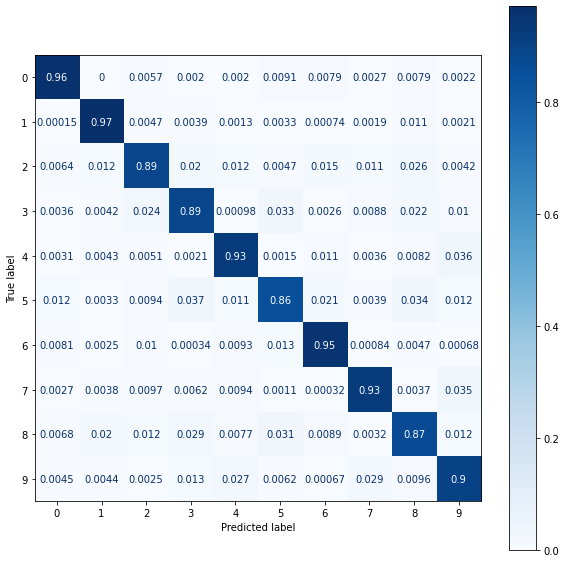

In [26]:
confusion_ma(y_train, y_train_pred, None)

In [27]:
accuracy_score(y_train, y_train_pred)

0.9151666666666667

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      5923
           1       0.95      0.97      0.96      6742
           2       0.91      0.89      0.90      5958
           3       0.89      0.89      0.89      6131
           4       0.92      0.93      0.92      5842
           5       0.88      0.86      0.87      5421
           6       0.93      0.95      0.94      5918
           7       0.94      0.93      0.93      6265
           8       0.87      0.87      0.87      5851
           9       0.89      0.90      0.89      5949

    accuracy                           0.92     60000
   macro avg       0.91      0.91      0.91     60000
weighted avg       0.91      0.92      0.92     60000



In the above, support is the number of actual occurrences of the class in the specified dataset. 

Let's see the `Decision_function`

In [29]:
ind = 0
sample = X_train[0,:].reshape(1,-1)

model.predict(sample)

array([5])

In [30]:
y_train[ind]

5

In [31]:
model.decision_function(sample)

array([[ 0.33094258, -7.47436304,  1.64188864,  8.38208382, -6.77808979,
         9.55670172, -4.56166303, -1.47937455,  0.46911556, -0.0872419 ]])

In [32]:
sample_scores = model.decision_function(sample)
print(model.classes_[np.argmax(sample_scores)])

5
